In [1]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',delimiter=';')  
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',delimiter=';')
import numpy as np
import matplotlib.pyplot as plt

In [2]:
del df['quality']

In [3]:
#SAMPLING INTO TRAINING AND TESTING
temp = np.random.rand(len(data)) < 0.75

train = data[temp]

test = data[~temp]

In [4]:
from sklearn import preprocessing 


In [5]:
#normalization
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
# Scaling down  train 
X_train_minmax=min_max.fit_transform(train)
train_norm = pd.DataFrame(X_train_minmax,columns=train.columns)


In [6]:
#Adding the class label attribute
train_norm['class label'] = np.where(train_norm["quality"]<=0.5, 'Low', 'High')
del train_norm['quality']

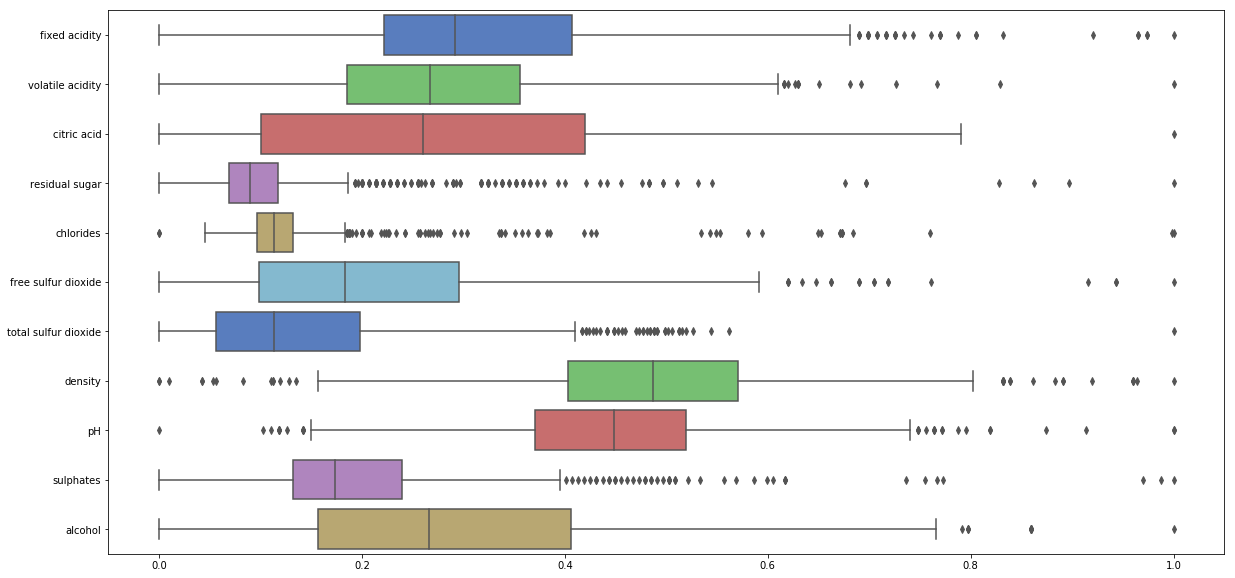

In [7]:
#Box plot to visualize outliers
import seaborn as sb
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20, 10))
sb.boxplot(data=train_norm,orient="h",palette="muted", ax =ax)

plt.show()

In [9]:
#Normalizing Test Data using instance of the transformer whc
X_test_minmax=min_max.fit_transform(test)
test_norm = pd.DataFrame(X_test_minmax,columns=test.columns)


In [10]:
test_norm['class label'] = np.where(test_norm["quality"]<=0.5, 'Low', 'High')
del test_norm['quality']

In [11]:
#CHECKING CORRELATION BETWEEN ATTRIBUTES
train_norm.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.237646,0.655504,0.092599,0.089801,-0.161011,-0.119797,0.667684,-0.675404,0.155825,-0.073448
volatile acidity,-0.237646,1.000000,-0.534069,0.026713,0.075576,-0.016404,0.085900,0.038506,0.204493,-0.238521,-0.211210
citric acid,0.655504,-0.534069,1.000000,0.117301,0.195909,-0.044274,0.047022,0.355133,-0.522261,0.292784,0.096096
residual sugar,0.092599,0.026713,0.117301,1.000000,0.015886,0.169842,0.210532,0.326794,-0.065093,-0.023148,0.044473
chlorides,0.089801,0.075576,0.195909,0.015886,1.000000,-0.001084,0.053551,0.182401,-0.273885,0.401046,-0.217362
free sulfur dioxide,-0.161011,-0.016404,-0.044274,0.169842,-0.001084,1.000000,0.671764,-0.043878,0.080235,0.073933,-0.044548
total sulfur dioxide,-0.119797,0.085900,0.047022,0.210532,0.053551,0.671764,1.000000,0.062703,-0.053864,0.076815,-0.188419
density,0.667684,0.038506,0.355133,0.326794,0.182401,-0.043878,0.062703,1.000000,-0.333324,0.123729,-0.511682
pH,-0.675404,0.204493,-0.522261,-0.065093,-0.273885,0.080235,-0.053864,-0.333324,1.000000,-0.197596,0.213559
sulphates,0.155825,-0.238521,0.292784,-0.023148,0.401046,0.073933,0.076815,0.123729,-0.197596,1.000000,0.078705


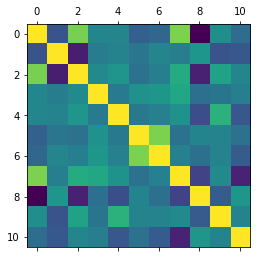

In [12]:
plt.matshow(train_norm.corr())
plt.show()

In [13]:
# CHECKING VARINACE OF ATTRIBUTES TO IDENTIFY ATTRIBUTES HAVING NEAR ZERO VARIANCE
train_norm.var()

fixed acidity           0.023449
volatile acidity        0.015248
citric acid             0.037039
residual sugar          0.007961
chlorides               0.006505
free sulfur dioxide     0.021862
total sulfur dioxide    0.013299
density                 0.019391
pH                      0.015253
sulphates               0.010764
alcohol                 0.028400
dtype: float64

In [14]:
#DETECTING AND HANDLING OUTLIERS USING 1.5*IQR RULE
for i, var_name in enumerate(df.columns):
        q75, q25 = np.percentile(train_norm[var_name], [75 ,25])
        iqr = q75 - q25
        
        min = q25 - (iqr*1.5)
        max = q75 + (iqr*1.5)
        train_norm.loc[train_norm[var_name] < min, var_name] = min
        train_norm.loc[train_norm[var_name] > max, var_name] = max

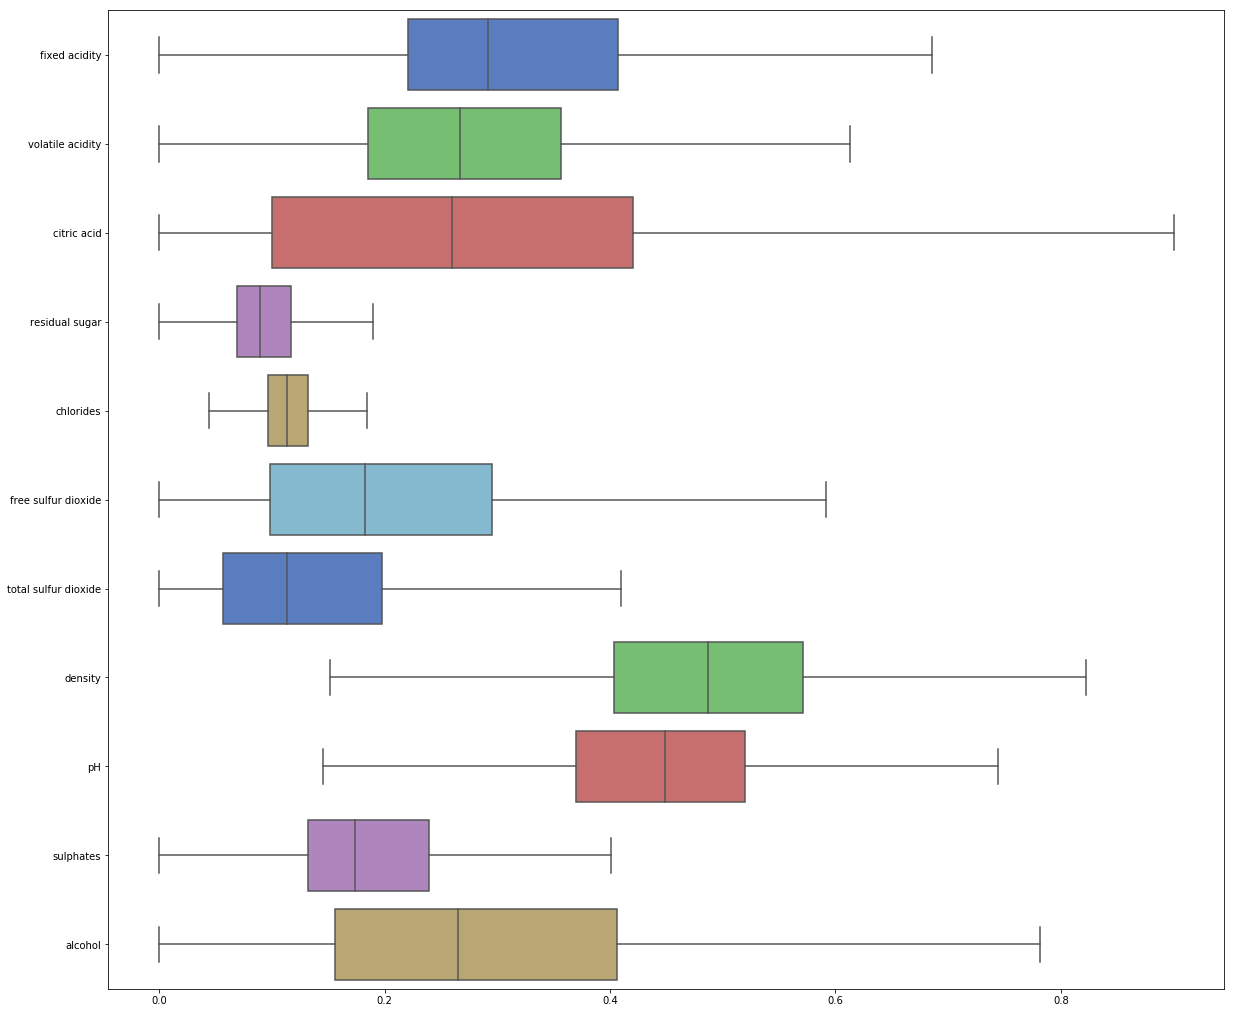

In [15]:
#VISUALIZING DATA WITH BOX PLOT AFTER REMOVING OUTLIERS
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20, 18))
sb.boxplot(data=train_norm,orient="h",palette="muted", ax =ax)

plt.show()

In [16]:
import math
#function to calculate the euclidean distance between two tuples. 
#we donot want to include class label for distance calculation. So argument length specifies till which attribute we have to consider
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

In [17]:
import operator 
#function to get k nearest neighbors of a given test instance
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):      #for loop to iterate through all the samples in the training set.
        dist = euclideanDistance(testInstance, trainingSet.iloc[x], length)
        distances.append((trainingSet.iloc[x], dist))  #distances are stored
    distances.sort(key=operator.itemgetter(1))      #obtained diistances are sorted
    neighbors = []
    # for loop to identify k most nearest instances.
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [18]:
import operator
#function to calculate the votes. Input is an array which has k neighbors which are nearest to the sample under consideration
#Ouput of this function a matrix having the count of votes for each value of class label.
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True) 
    return sortedVotes

In [19]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet.iloc[x,-1] == predictions[x]:      
            correct += 1                     #increment the count if instance predicted label matches actual label
    return (correct/float(len(testSet))) * 100.0    # Accuracy is total correct predictions divided by total number of instances

In [20]:
predictions=[]
value_pred = []
value_true = []
value_pred = []
output_df = pd.DataFrame(columns=['predicted label', 'actual label', 'posterior prob'])
k = 11
# for loop to iterate through the test data set
for x in range(len(test_norm)):
    #getting k nearest neighbors
    neighbors = getNeighbors(train_norm, test_norm.iloc[x], k)
    #calculating the count of each class label in k neighbors
    sortedVotes = getResponse(neighbors)
    result = sortedVotes[0][0]
    
    #storing the predicted value to calculate accuracy later
    predictions.append(result)  
    act = test_norm.iloc[x,-1]
    
    #storing labels for ROC curve plotted later. 0 indicates Low and 1 indicates High
    low = "Low"    
    if act == low:        
        value_true.append(0)
    else:
        value_true.append(1)   
    
    #Calculate posterior probability P(low/x)
    if sortedVotes[0][0] == low:        
        post_prob = sortedVotes[0][1]/k
    else:
        post_prob = 1 - sortedVotes[0][1]/k
    value_pred.append(post_prob)
    
    #Applying the classification rule
    if(post_prob >= 0.5):
        result = "Low"
    else:
        result = "High"
    
    output_df = output_df.append({'predicted label': result, 'actual label': repr(act), 'posterior prob': repr(post_prob)}, ignore_index=True)
    #print('> predicted=' + repr(result) + ', actual=' + repr(test_norm.iloc[x,-1]) + ', posterior probability=' + repr(post_prob))
accuracy = getAccuracy(test_norm, predictions)
print(accuracy)

In [21]:
output_df.head(12)

,predicted label,actual label,posterior prob
0,Low,'Low',1.0
1,High,'High',0.2727272727272727
2,Low,'Low',1.0
3,Low,'Low',0.7272727272727273
4,High,'Low',0.4545454545454546
5,Low,'Low',0.9090909090909091
6,Low,'High',0.5454545454545454
7,Low,'Low',0.7272727272727273
8,Low,'Low',0.8181818181818182
9,Low,'Low',0.5454545454545454


In [22]:
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(test_norm['class label'], predictions)
print("Confusion matrix:\n%s" % confusion_matrix)

Confusion matrix:
Predicted  High  Low  __all__
Actual                       
High        158   48      206
Low          80  123      203
__all__     238  171      409


In [28]:
print("STATISTICS OF THE MODEL")
confusion_matrix.print_stats()

In [29]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(value_true, value_pred,pos_label=0)
roc_auc = auc(false_positive_rate, true_positive_rate)

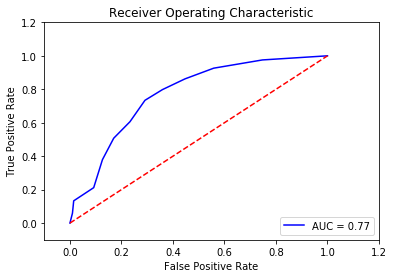

In [30]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [206]:
    #knn off the shelf implementation

In [31]:
train_copy = train_norm.copy(deep=True)
test_copy = test_norm.copy(deep=True)
del train_copy['class label']
del test_copy['class label']

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k =7 )
knn = KNeighborsClassifier(n_neighbors=13)

# fitting the model
knn.fit(train_copy, train_norm['class label'])

# predict the response
pred = knn.predict(test_copy)

# evaluate accuracy
print("  OFF-THE-SHELF IMPLEMENTATION RESULTS  ")
print(accuracy_score(test_norm['class label'], pred))

In [36]:
from sklearn.metrics import classification_report
target_names = ['Low', 'High']
print(classification_report(test_norm['class label'], pred, target_names=target_names))
